In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\..'))
	print(os.getcwd())
except:
	pass


C:\Users\Thomas Athey\Documents\Labs\Labs\jovo\dos_and_donts


In [2]:
import numpy as np
from math import sqrt
from scipy.stats import pearsonr
from graspy.plot import heatmap
from sklearn.covariance import GraphicalLassoCV
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
np.random.seed(0)

In [11]:
def gen_data(n,m,t,noise_sig):
    data = np.random.normal(0,1,(n-1,t,m))
    n0 = np.expand_dims(data[0,:,:] + data[1,:,:],axis=0)
    data = np.concatenate((n0,data),axis=0)
    connectomes = []
    y = []
    
    for subject in range(m):
        connectome = np.corrcoef(data[:,:,subject])
        connectomes.append(connectome)
        y.append(connectome[0,1] + np.random.normal(0,noise_sig))

    connectomes = np.stack(connectomes,axis=2)
    y = np.array(y)
    
    return connectomes, y

In [12]:
def calc_values_lasso(connectomes,y):

    n = connectomes.shape[0]
    
    features = []
    features.append(y)
    for i in range(0,n):
        for j in range(i+1,n):
            edges = connectomes[i,j,:]
            features.append(edges)

    features = np.stack(features,axis=1)
    
    #All************************************graphical lasso
    inds = np.triu_indices(n=n,k=1)

    model = GraphicalLassoCV(cv=3)
    model.fit(features)
    cov_ = model.covariance_
    diags = np.power(np.diagonal(cov_),-1/2)
    scale = np.diag(diags)
    feature_corr_ = scale @ cov_ @ scale

    edge_corrs = np.zeros((n,n))
    edge_corrs[inds] = feature_corr_[0,1:]
    edge_corrs = edge_corrs + edge_corrs.T
    
    prec_ = model.precision_
    diags = np.power(np.diagonal(cov_),1/2)
    scale = np.diag(diags)
    feature_invcorr_ = scale @ prec_ @ scale
    
    
    edge_invcorrs = np.zeros((n,n))
    edge_invcorrs[inds] = feature_invcorr_[0,1:]
    edge_invcorrs = edge_invcorrs + edge_invcorrs.T
    
    cor_true = edge_corrs[0,1]
    cor_spurious = edge_corrs[1,2]
    invcor_true = edge_invcorrs[0,1]
    invcor_spurious = edge_invcorrs[1,2]
    
    return cor_true, cor_spurious, invcor_true, invcor_spurious

In [ ]:
def calc_values_normal(connectomes,y):

    n = connectomes.shape[0]
    
    features = []
    features.append(y)
    for i in range(0,n):
        for j in range(i+1,n):
            edges = connectomes[i,j,:]
            features.append(edges)

    features = np.stack(features,axis=1)
    
    #All************************************graphical lasso
    inds = np.triu_indices(n=n,k=1)

    feature_corr_ = np.corrcoef(features)
    feature_invcorr_ = np.linalg.inv(feature_corr_)
    
    
    edge_invcorrs = np.zeros((n,n))
    edge_invcorrs[inds] = feature_invcorr_[0,1:]
    edge_invcorrs = edge_invcorrs + edge_invcorrs.T
    
    cor_true = edge_corrs[0,1]
    cor_spurious = edge_corrs[1,2]
    invcor_true = edge_invcorrs[0,1]
    invcor_spurious = edge_invcorrs[1,2]
    
    return cor_true, cor_spurious, invcor_true, invcor_spurious

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.195198042658698e-11, tolerance: 4.5406269633381824e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.019471958645245e-10, tolerance: 5.1692009608568985e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.644971029044593e-10, tolerance: 3.50856480464923e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.637578407233611e-11, tolerance: 3.777385413897373e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.512880299026035e-09, tolerance: 4.3522417653805186e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.557963927185986e-09, tolerance: 2.3130264604088734e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3184030863561125e-10, tolerance: 3.6091137727691276e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2533343994266567e-09, tolerance: 7.953246379378388e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1779668027302294e-09, tolerance: 3.794991265941013e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarnin

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.86130709146694e-10, tolerance: 3.3790390878472e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6544842653874095e-09, tolerance: 5.201859299600798e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2377265356454332e-10, tolerance: 4.221999271732415e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Ob

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.172484222018252e-10, tolerance: 4.5599063368738355e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0630769461500373e-10, tolerance: 3.2429339297962294e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.910096075728566e-09, tolerance: 6.109352544540268e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4256955902305912e-10, tolerance: 3.99819714541078e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4970305450623155e-09, tolerance: 3.26054282839184e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1101745234914917e-09, tolerance: 9.973370327897281e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7384527815396513e-09, tolerance: 5.1289438348736125e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.267933891065681e-09, tolerance: 3.9627275597581906e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.236466530092476e-09, tolerance: 5.6179757794016656e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarnin

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.143704071616101e-11, tolerance: 3.7447988797948656e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9573845325772674e-10, tolerance: 5.713776157379158e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.682010481635832e-11, tolerance: 5.713776157379158e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

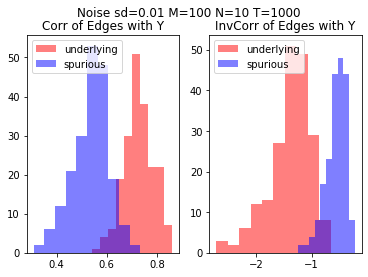

In [30]:
#Distributions of what we are doing

n_iter = 200
sd = 0.01
n=10
m=100
T=1000

distributions = np.zeros((4,n_iter))

for i in range(n_iter):
    connectomes, y = gen_data(n,m,T,sd)
    cor_true, cor_spurious, invcor_true, invcor_spurious = calc_values_lasso(connectomes,y)

    distributions[0,i] = cor_true
    distributions[1,i] = cor_spurious
    distributions[2,i] = invcor_true
    distributions[3,i] = invcor_spurious

    

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(hspace=.5)
ttl = 'Noise sd=' + str(sd) + ' M=' + str(m) + ' N=' + str(n) + ' T=' + str(T)
fig.suptitle(ttl)
axs[0].hist(distributions[0,:],color='red',alpha=0.5,label='underlying')
axs[0].hist(distributions[1,:],color='blue',alpha=0.5,label='spurious')
axs[0].set_title('Corr of Edges with Y')
axs[0].legend()


axs[1].hist(distributions[2,:],color='red',alpha=0.5,label='underlying')
axs[1].hist(distributions[3,:],color='blue',alpha=0.5,label='spurious')
axs[1].set_title('InvCorr of Edges with Y')
axs[1].legend()




In [ ]:
#Distributions of what we are doing

n_iter = 100
sd = 0.1
n=10
m=100
T=1000

distributions = np.zeros((4,n_iter))

for i in range(n_iter):
    connectomes, y = gen_data(n,m,T,sd)
    cor_true, cor_spurious, invcor_true, invcor_spurious = calc_values_normal(connectomes,y)

    distributions[0,i] = cor_true
    distributions[1,i] = cor_spurious
    distributions[2,i] = invcor_true
    distributions[3,i] = invcor_spurious

    


fig, axs = plt.subplots(1,2)
fig.subplots_adjust(hspace=.5)
ttl = 'Noise sd=' + str(sd) + ' M=' + str(m) + ' N=' + str(n) + ' T=' + str(T)
fig.suptitle(ttl)
axs[0].hist(distributions[0,:],color='red',alpha=0.5,label='underlying')
axs[0].hist(distributions[1,:],color='blue',alpha=0.5,label='spurious')
axs[0].set_title('Corr of Edges with Y')
axs[0].legend()


axs[1].hist(distributions[2,:],color='red',alpha=0.5,label='underlying')
axs[1].hist(distributions[3,:],color='blue',alpha=0.5,label='spurious')
axs[1].set_title('Corr of Edges with Y')
axs[1].legend()